In [111]:
import numpy as np
import conductivity as sigma
from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
plt.rcParams['text.usetex']=True

In [81]:
beta = 0.3
u = lambda x : sigma.u_exp(x,beta)
nthetas = 100
thetas = np.linspace(0.,2.*np.pi,nthetas,endpoint=False)

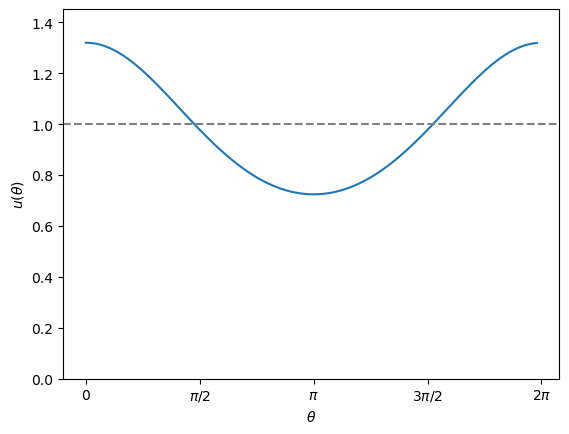

In [82]:
plt.plot(thetas,u(thetas))
plt.axhline(1.,linestyle='dashed',color='gray')
plt.ylim(0.,1.1*max(u(thetas)))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$u(\theta)$')
plt.xticks([0.,np.pi/2.,np.pi,3.*np.pi/2.,2.*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
plt.show()

In [91]:
nws = 200
nqs = 200
ws = np.linspace(0.,5.,nws)
qxs = np.linspace(0.,4.,nqs)

sigmas = np.zeros((nws,nqs,2,2),dtype=complex)
for i in range(nws):
    for j in range(nqs):
        q = np.array([qxs[j],0.])
        sigmas[i,j,:,:] = sigma.conductivity(ws[i],q,u,nthetas)

In [92]:
gamma_tr =sigma.calc_tr(u)
print(gamma_tr)

0.8516625730591247


In [93]:
sigma_perps = sigmas[:,:,1,1] 

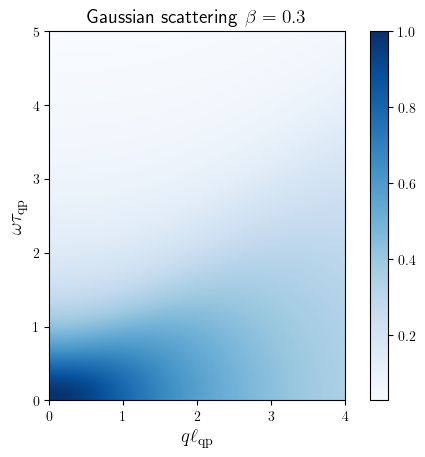

In [114]:
plt.imshow(np.real(sigma_perps),origin='lower',extent=[qxs[0],qxs[-1],ws[0],ws[-1]],cmap='Blues')
plt.colorbar()
plt.xlabel(r'$q \ell_{\rm qp}$',fontsize=14)
plt.ylabel(r'$\omega \tau_{\rm qp}$',fontsize=14)
plt.title(r'Gaussian scattering $\beta = 0.3$',fontsize=14)
plt.show()

In [ ]:
plt.imshow(np.real(sigma_perps),origin='lower',extent=[qxs[0],qxs[-1],ws[0],ws[-1]],cmap='Blues')
plt.colorbar()
plt.xlabel(r'$q \ell_{\rm el}$',fontsize=14)
plt.ylabel(r'$\omega \tau_{\rm el}$',fontsize=14)
plt.show()

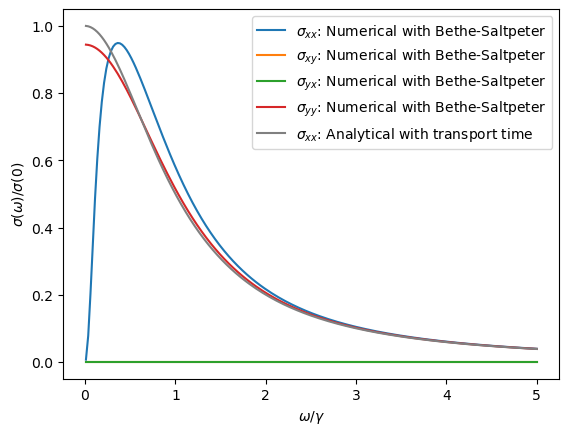

In [78]:
plt.plot(ws,np.real(sigmas[:,0,0]),label=r'$\sigma_{xx}$: Numerical with Bethe-Saltpeter')
plt.plot(ws,np.real(sigmas[:,0,1]),label=r'$\sigma_{xy}$: Numerical with Bethe-Saltpeter')
plt.plot(ws,np.real(sigmas[:,1,0]),label=r'$\sigma_{yx}$: Numerical with Bethe-Saltpeter')
plt.plot(ws,np.real(sigmas[:,1,1,]),label=r'$\sigma_{yy}$: Numerical with Bethe-Saltpeter')
plt.plot(ws,1./((ws/gamma_tr)**2+1.),color='gray',label=r'$\sigma_{xx}$: Analytical with transport time')
plt.xlabel(r'$\omega/\gamma$')
plt.legend()
plt.ylabel(r'$\sigma(\omega)/\sigma(0)$')
plt.show()